In [38]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

# Dimensionality Reduction

Bij data science werk je vaak met datasets die enorme hoeveelheden variabelen bevaten. Het kan dan voor performance of overzicht belangrijk zijn om deze data te verminderen. Dit wordt dimensionality reduction genoemd, en kent twee vormen:

1. Feature elimination - waarbij je kolommen die niet interessant zijn voor je model geheel weghaald.
2. Feature extraction - waarbij je nieuwe informatie wint uit variabelen, en hiermee nieuwe components maakt.

Principal Component Analysis is een feature extraction techniek.


# PCA - Principal Component Analysis

### Wat is PCA?
PCA is een manier om data te vereenvoudigen door het aantal dimensies te verkleinen. PCA kijkt naar relaties tussen variabelen. Op basis daarvan wordt er een variabele gecreëerd die meerdere als het ware samenvat. Dit wordt gezien als een nieuwe component.

Stel je hebt een dataset (zie hieronder). 

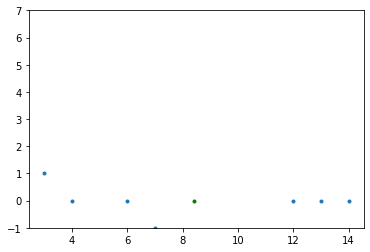

De data lijkt horizontaal op de x-as te liggen. Dit houdt in dat de x-as de data het best beschrijft. De y-as is als het ware verwaarloosbaar. PCA is dus ook niet nodig, want de x-as dient al als een component

Nu heb je een andere dataset (zie hieronder)

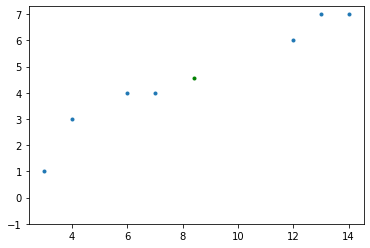

Hier zie je een relatie tussen 2 variabelen. Er is duidelijk een richting van de data, maar beide assen zijn veelzeggend. Nu kan je een lijn trekken door het middelpunt, zodat de lijn de data het best beschrijft. 

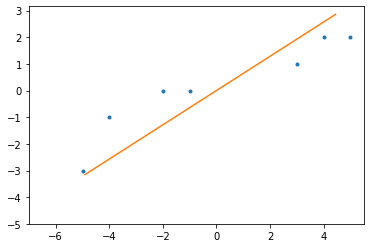

Dit is de beste component. Ofterwijl dit is de as die de ligging van de data het best beschrijft (zonder gebruik te maken van andere assen). Door de punten op deze lijn te projecteren kun je 2 dimensionale data op een 1 dimensionale lijn uitdrukken, zonder dat teveel data verloren gaat. 

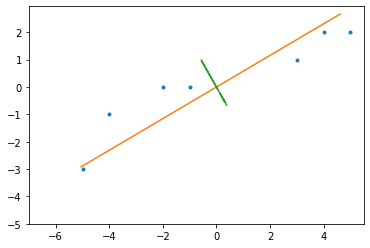

Voor het kiezen van de tweede component wordt er gekozen voor een lijn die loodrecht staat op alle vorige components. Opnieuw wordt gekeken welke loodrechte lijn de data het best beschrijft. Uiteindelijk zijn de gekozen assen de assen waarin waarden het meest afwijken. <br>

Merk op dat in 2 dimensies maar 1 lijn loodrecht staat op de PC1 (de eerste component). Dit wordt automatisch PC2. In 3 dimensies kan een loodrechte lijn 360 graden draaien rondom PC1 door de diepte. <br>

Het is bewezen dat het kiezen van een loodrechte lijn boven andere lijnen de data het best beschrijft en de variance het hoogst houdt. Waarom dat zo is valt buiten de scope van dit project.

Uiteindelijk wordt er gekozen voor de x beste components om de data te vereenvoudigen. Bij grote datasets (meer dan 50 kolommen) is de norm rond de 10-15 components. Nog beter is om te kijken naar de explained variance die minimaal 70-80% van de unexplained variance moet zijn.

<b>(Un)explained Variance</b>

Voor het vinden van de components wil je zoveel mogelijk variantie behouden: de spreiding van data geeft aan hoe verschillend waarden zijn en dat verschil wil je niet negeren. De unexplained variance is het gemiddelde verschil met het middenpunt van de data. Zie figuur hieronder.

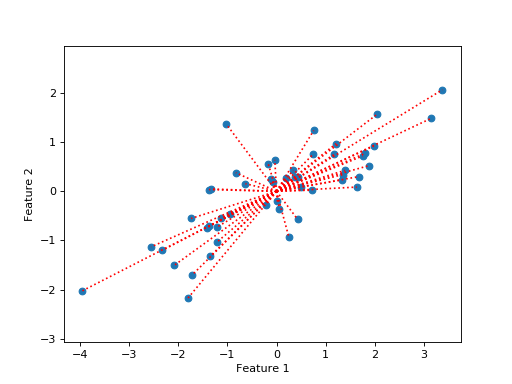

De explained variance is het gedeelte van de totale variantie die verklaard wordt door de components. Data dat geprojecteerd wordt op een component verlaagd de variantie in de data. Door de explained variance te delen door de unexplained variance bepaal je hoeveel procent van de variantie over blijft.

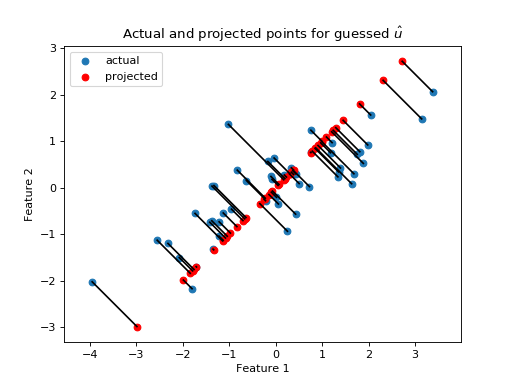

### Voordelen van PCA

* **Versnellen algoritmen**. Door het verkleinen van het aantal variabelen/dimensies kunnen algoritmes sneller relaties vinden. 
* **Data visualisatie**. Data met meer dan 3 variabelen zijn moeilijk om te visualiseren. Met PCA kun je bijvoorbeeld data van 10 variabelen verkleinen naar 3 zodat het in een grafiek geplot kan worden
* **Overfitting voorkomen**. In grote datasets zit meestal noise: data dat geen betekenis heeft. Met PCA is het mogelijk data dat geen unieke relatie heeft met andere data weg te filteren. Hierdoor verminder je de hoeveelheid nutteloze data en voorkom je dat algoritmes deze waarden mee nemen om nuances in de data te kunnen voorspellen. PCA weet alleen welke data samengevat kan worden, maar weet niet welke data bruikbaar is. Het kan dus zijn dat PCA data weggooit dat juist nodig is voor algoritmes om een juiste voorspelling te maken.


### Wanneer gebruik je PCA?

1. Wil je minder variabelen (dimensionality reduction), maar kan je geen variabelen vinden die je volledig wilt verwijderen?
2. Wil je dat je variabelen onafhankelijk zijn van elkaar?
3. Is het okay als je zelfstandige variabelen minder interpreteerbaar zijn?

Als je op alles ja kunt zeggen, is PCA geschikt voor je model.<br><br><br>


# Bepalen van variantie en components

Hier heb je een 2 dimensionale dataset met willekeurige data. Om het te vergemakkelijken is het gemiddelde van alle waarden afgetrokken, zodat het middelpunt nu op de oorsprong ligt.

In [39]:
X=np.random.multivariate_normal([0,0],[[3,1.5],[1.5,1]],size=50).T
x_mean = X.mean(axis=1)
X[0] = X[0] - x_mean[0]
X[1] = X[1] - x_mean[1]

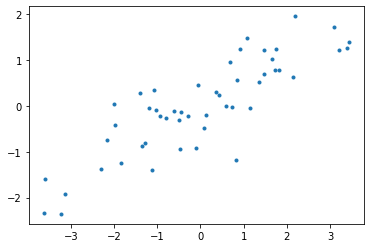

In [40]:
plt.plot(X[0],X[1],marker=".",linestyle="")

Gegeven willekeurige data. Merk op dat er een verband is tussen de 2 variabelen. 
Nu willen we bepalen welke component het beste gefit kan worden door de data. Dit wordt gedaan door een lijn te trekken door het middelpunt van de data die de data het best beschrijft. Dat houdt in dat de spreiding van alle datapunten op de gekozen lijn zo hoog mogelijk is. 

Stel je trekt een lijn met een hoek van 45 graden door het midden van de data.

In [41]:
line = np.array([np.cos(math.radians(45)),np.sin(math.radians(45))])
line

array([0.70710678, 0.70710678])

<h4>Unexplained Variance</h4>

De totale variantie van de data, dus de afwijking met het middelpunt, is hieronder berekend. Doordat het middelpunt in het midden ligt kan de stelling van pythagoras makkelijk toegepast worden om de variantie te berekenen.

In [42]:
np.sum(X**2)

210.20077614206534

In [43]:
row=line.reshape((1,2))
c_values = row.dot(X)
projected = row.T.dot(c_values)

Hieronder zijn de datapunten geprojecteerd op de 45 graden lijn.

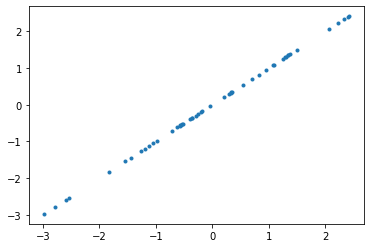

In [44]:
plt.plot(projected[0],projected[1],marker=".",linestyle="")

<h4>Explained Variance</h4>

In [45]:
np.sum(projected ** 2)

182.31605417660361

We zien hier dat de lijn van 45 graden ... variance verklaard (dataset is random). Door de explained variance te delen door de unexplained variance bepaal je de relatieve variance. Lees hier meer over de variance en hoe je het berekend. Je kunt [hier](https://ro-che.info/articles/2017-12-11-pca-explained-variance) meer lezen over variance en hoe je het berekend.

<h3>Opdracht</h3><br>
Doe een for loop over angle_of_line en zoek de beste component. Plot de lijn en de data om te controleren of het kopt. <br>
Gebruik de functie <i>line_projection</i> om de geprojecteerde punten te krijgen. 


In [46]:
def line_projection(data, angle_of_line):
    radians=math.radians(angle_of_line)
    if radians==0:
        radians+=0.0001
    u = np.array([np.cos(radians),np.sin(radians)])
    u=u.reshape((1,2))
    c_values = u.dot(data)
    projected = u.T.dot(c_values)
    return projected

In [67]:
highest = 0
h_angle = 0
for angle in range(0, 1361):
    projected = line_projection(X, angle)
    variance = np.sum(projected**2)
    if variance > highest:
        highest = variance
        h_angle = angle
        
print(highest, h_angle)

198.63149445170444 28


Hoveel % van de totale variantie wordt verklaard door de gekozen component?

In [48]:
highest / np.sum(X ** 2)

0.9449608041288023

Hoeveel mogelijke lijnen zijn er om te kiezen als de tweede component in een 2d ruimte? En hoeveel in een 3d ruimte?

Bepaal en plot de tweede (1 na beste) component.

Bronnen<br>

https://matthew-brett.github.io/teaching/pca_introduction.html

# Toepassing met scikit-learn
Scikit-learn heeft een module om makkelijk PCA toe te passen op je data. Om hier een voorbeeld van te geven pakken we de iris dataset.

In [49]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
irisDf = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

Ons doel is om 4 numerieke kolommen te reduceren naar 2.

In [50]:
irisDf

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


PCA werkt niet op kolommen die veel van elkaar afwijken. Het is daarom belangrijk dat deze genormaliseerd worden.

In [51]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

irisScaled = irisDf.loc[:, features].values

irisScaled = StandardScaler().fit_transform(irisScaled)

In [52]:
pd.DataFrame(data = irisScaled, columns = features)

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


En nu de daadwerkelijke toepassing van PCA.

Bekijk de [documentatie](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) voor meer informatie over sklearn's PCA.

In [53]:
pca = PCA(n_components = 0.95)

pca.fit(irisScaled)
principalComponents = pca.transform(irisScaled)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf = pd.concat([principalDf, irisDf[['target']]], axis = 1)

In [54]:
principalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


Na de toepassing van PCA hebben we nog maar 2 dimensies. Dit maakt het veel makkelijker om een duidelijk plaatje van de data te schetsen in de visualisatie.

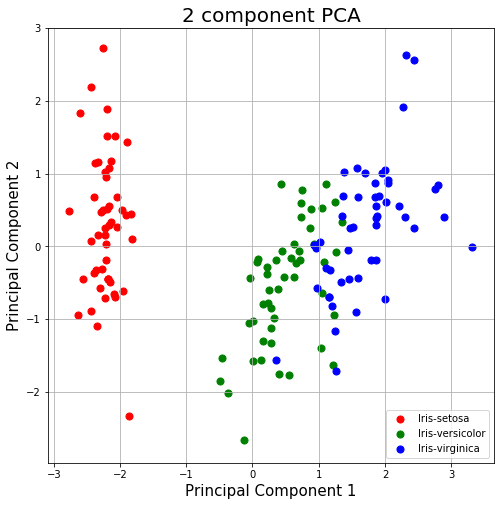

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()

# Opdracht - PCA toepassen op machine learning

De iris dataset was vrij klein met slechts 150 rijen en 4 numerieke kolommen. PCA was daarom niet interessant voor het winnen van performance. Daarom nu de volgende opdracht.

De MNIST dataset van handgeschreven cijfers heeft een enorme dimensie, met 784 feature kolommen. PCA wordt hier interessant, omdat het de dimensionaliteit significant kan reduceren met vrijwel geen verlies in de kwaliteit van de voorspelling.

Hier volgt een al geschreven model voor het voorspellen van de handgeschreven cijfers in de MNIST dataset. Het model probeert te voorspellen welk getal (label/lbl) hoord bij een plaatje (image/img).

**Opdracht: Implementeer Principal Component Analysis in de volgende code. De module is al geimporteerd als `PCA`.**

Stappen:

1. Normaliseer de train_img en test_img.
2. Fit PCA op de train data.
3. Transformeer de train en test data met PCA.
4. Voer de logistic regression verder uit.

Werk dus alleen op de images, niet de labels. Kijk naar hoe de dimensionaliteit verandert met `.shape`.

In [56]:
mnist = fetch_openml('mnist_784')

In [57]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [58]:
train_img.shape

(60000, 784)

In [59]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [60]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
logisticRegr.score(test_img, test_lbl)

0.9093

In [ ]:
irisScaled = irisDf.loc[:, features].values

irisScaled = StandardScaler().fit_transform(irisScaled)

pd.DataFrame(data = irisScaled, columns = features)

pca = PCA(n_components = 0.95)

pca.fit(irisScaled)
principalComponents = pca.transform(irisScaled)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf = pd.concat([principalDf, irisDf[['target']]], axis = 1)

# De wiskunde
Om een eigen PCA te schrijven is een bepaalde wiskundige kennis nodig. De volgende begrippen komen daarbij kijken:
- standard deviation
- variance
- covariance
- covariance matrix
- eigenvectors
- eigenvalues
- feature vector
- transpose


### Over gemiddeldes en spreiding
Om datasets met elkaar te vergelijken en zodoende een principal component te herleiden dienen de datasets genormalizeerd te worden, dit doe je door de gemiddelde waarde van je dataset af te trekken van elke data point. 
De standard deviation en variance zijn dicht aan elkaar gekoppelt. De variance is de standard deviation in het kwadraat. Deze waardes zeggen beide iets over de spreiding van de data, voor de PCA gebruiken we de variance.

- Standard Deviation:
$$ sd(X) =\sqrt{\frac{\sum_{i=1}^n(X_i-X)^2}{(n-1)}}$$

- Variance:
$$ var(X) =\frac{\sum_{i=1}^n(X_i-X)^2}{(n-1)}$$

De covariance is een waarde die de relatie tussen twee datasets weergeeft. Is de waarde positief, dan worden beide datasets samen groter. Wanneer de covariance negatief is word de ene dataset groter wanneer de andere kleiner word. Deze relaties geven de mogelijkheid om tot nieuwe components te komen. Om deze te vinden moeten de berekende covariances in een matrix worden geplaatst. De covariance matrix.
- Covariance:
$$ cov(X,Y) =\frac{\sum_{i=1}^n(X_i-X)(Y_i-Y)}{(n-1)}$$
- Covariance Matrix:
$$C^{nxn}=(c_{i,j},c_{i,j}=cov(Dim_i,Dim_j))$$

### De Components
Vanuit de covariance matrix kunnen eigenvectors en eigenvalues worden herleid. Deze eigenvectors vertellen de richting waarin een matrix kan bewegen zonder te vervormen. Ze geven de assen weer waarop je de data kan vergroten. De eigenvalues geven de lengte weer. Voor elke dimensie in de covariance matrix is een eigenvector, eigenvalue paar te vinden. Voor een covariance matrix van $nxn$ zijn dus $n$ eigenvalue-vector paren te herleiden. Hoe groter de eigenvalue hoe geschikter de corresponderende eigenvector te gebruiken is als component. Om de gevonden paren te kunnen vergelijken is het zaak de eigenvectors te schalen naar lengte 1. Voor het verkrijgen van de eigenvector zijn verschillende packages beschikbaar. Als je een eigen implementatie wilt schrijven is [Elementary Linear Algebra](https://www.kau.edu.sa/Files/0009138/Subjects/Larson%20-%20Edwards%20y%20Falvo%20Elementary%20Linear%20Algebra.pdf) een goed uitgangspunt.   

- Eigenvectors & eigenvalues:
    $$eigenvalue[eigenvector]$$
    
Wanneer er een selectie is gemaakt van de gewenste eigenvectors, vanaf nu components, worden deze deel van de nieuwe feature vector. De feature vector is een lijst waarin alle nieuwe components opgeslagen.

Om de nieuwe dataset te verkrijgen is het nodig de transpose van de feature vector te vermenigvuldigen met de transpose van de genormalizeerde data. De transpose is de spiegeling van een $nxm$ matrix over de as van positie 1,1 tot n,m
- Transpose:
    $$C^T_{ij}=C_{ji}$$

### Opdracht
Probeer de fit_transform van de scikit PCA zelf te schrijven. En gebruik waarnodig de bovenstaande formules, danwel numpy. Onderstaand stappenplan geeft een mogelijke pca implementatie weer.
Toets je PCA op de iris dataset.
1. Normalizeer de data

2. Bereken de covariance matrix

3. Bereken de eigenvectors en eigenvalues van de covariance matrix

4. Bepaal de components welke je gaat gebruiken voor je feature vector

5. Bepaal de nieuwe dataset

$nieuweDataset = featureVector^T x genormalizeerdeData^T$
    


Bronnen:
* https://www.quora.com/Can-we-use-PCA-algorithm-to-avoid-Over-fitting-issues-If-yes-when-do-you-choose-between-Regularization-and-PCA
* https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
* https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
* http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf 
* https://www.kau.edu.sa/Files/0009138/Subjects/Larson%20-%20Edwards%20y%20Falvo%20Elementary%20Linear%20Algebra.pdf 
* https://pathmind.com/wiki/eigenvector